In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from os import listdir

In [2]:
def read_CSV_in_years(YEARS = ('2019', '2020', '2021', '2022', '2023')):
    '''
    Parameters
    -----------
    YEARS        : Years to include/open.

    Parameters
    -----------
    Opens all the MRT train csv files within the provided years.
    Call cleanCSV() to open, clean, and return a dataframe.

    Return   
    ------------
    pd.Dataframe : All the cleaned CSVs compiled into a single dataframe.
    '''
    compiled_df = []
    FILES = listdir('MTR Parsed')

    # OPEN AND STORE ALL THE TARGET CSV FILES
    for fileName in FILES:
        if fileName[-4:] == '.csv' and fileName[:4] in YEARS:
            compiled_df.append(clean_CSV(fileName))
    
    return pd.concat(compiled_df)

In [3]:
def clean_CSV(fileName, min_traffic_threshold = 0):
    '''
    Parameters
    -----------
    fileName               : String name of the .csv file.
    min_traffic_threshold  : Stations records with daily traffic below the threshold will be dropped.

    Parameters
    -----------
    Open the csv file and drop all records of stations with little/no activity for the entire day.

    Return   
    ------------
    pd.Dataframe : The cleaned csv data.
    '''
    df = pd.read_csv('MTR Parsed/' + fileName)
    df = df.drop(df.columns[0], axis=1)
    
    # CHECK THE TRAFFIC ACTIVITY OF PER STATION EVERYDAY 
    activity_check = df[['Day', 'Station_No', 'Net_Traffic']]
    activity_check = activity_check.groupby(['Day', 'Station_No']).sum()
    
    # KEEP ONLY THE STATION RECORDS THAT HAD ACTIVITY FOR THAT DAY
    records_to_keep = activity_check[activity_check.values > min_traffic_threshold]
    df = df.set_index(['Day', 'Station_No']).join(records_to_keep, lsuffix='' , rsuffix='_ActivityCheck')
    df = df.dropna(axis=0)
    df = df.rename(columns={df.columns[-1]:'Station_Total_Day_Traffic'})
    
    df = df.set_index('Date')
    return df

In [4]:
df = read_CSV_in_years()
df

,Time,Station_Name,Entry,Exit,Net_Traffic,Year,Month,Hour,Weekday,Is_Holiday,Station_Total_Day_Traffic
Date,,,,,,,,,,,
2019-01-01,03:00 - 03:59,North Ave,0,0.0,0.0,2019,1,3,1,True,36598.0
2019-01-01,04:00 - 04:59,North Ave,0,0.0,0.0,2019,1,4,1,True,36598.0
2019-01-01,05:00 - 05:59,North Ave,0,0.0,0.0,2019,1,5,1,True,36598.0
2019-01-01,06:00 - 06:59,North Ave,376,13.0,389.0,2019,1,6,1,True,36598.0
2019-01-01,07:00 - 07:59,North Ave,471,240.0,711.0,2019,1,7,1,True,36598.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,22:00 - 22:59,Taft,0,0.0,0.0,2023,12,22,6,True,58246.0
2023-12-31,23:00 - 23:59,Taft,0,0.0,0.0,2023,12,23,6,True,58246.0
2023-12-31,00:00 - 00:59,Taft,0,0.0,0.0,2023,12,0,6,True,58246.0


([<matplotlib.axis.XTick at 0x1f74a128190>,
 [Text(0.0, 0, '2019-01-01'),
  Text(116.0, 0, '2019-06-01'),
  Text(330.0, 0, '2020-01-01'),
  Text(406.0, 0, '2020-06-01'),
  Text(449.0, 0, '2021-01-01'),
  Text(530.0, 0, '2021-06-01'),
  Text(744.0, 0, '2022-01-01'),
  Text(890.0, 0, '2022-06-01'),
  Text(1087.0, 0, '2023-01-01')])

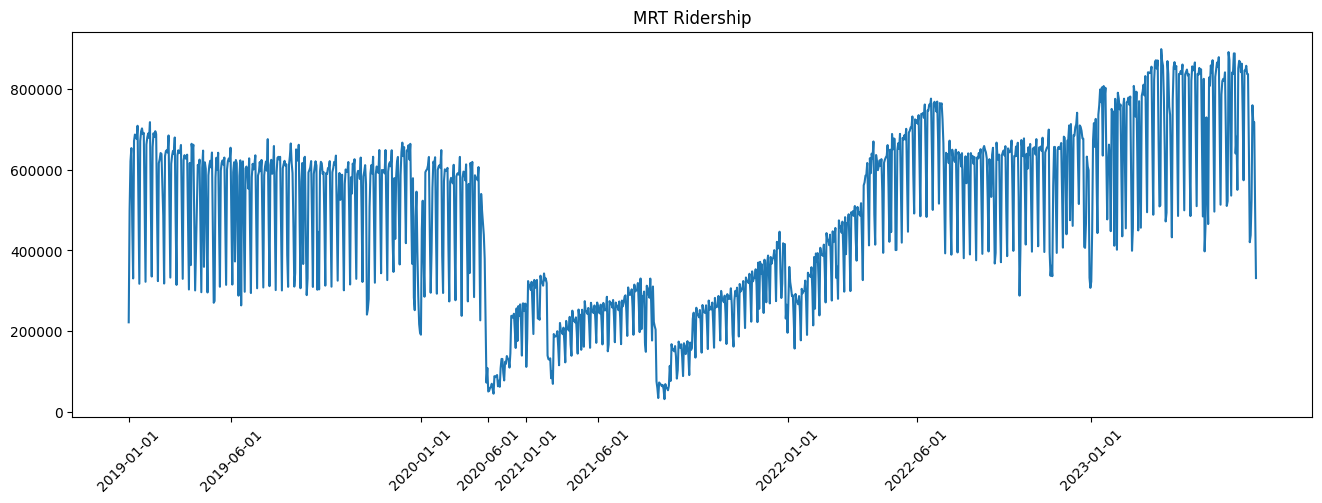

In [6]:
timeSummary = df['Net_Traffic'].groupby('Date').sum()

fig = plt.subplots(figsize=(16, 5))
plt.plot(timeSummary)
plt.title("MRT Ridership")

ticks = ['2019-01-01', '2019-06-01', 
         '2020-01-01',  '2020-06-01',
         '2021-01-01',  '2021-06-01',
         '2022-01-01',  '2022-06-01',
         '2023-01-01']
plt.xticks(ticks, rotation=45)

# Title and Authors

# Introduction of Problem

Link of Dataset

# List of Requirements

# Exploratory Analysis

# Data Cleaning and Preprecessing

# Feature Extraction

# Model Training

# Feature Selection & Hyperparameter Tuning

# Summary of the Best Model Configurat